In [32]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
SFD = os.environ.get("SFD",r"D:\data\ortoCC\fine_tune_scoring_function\sets")
from score_utils import *
from set_utils import *

from glob import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\data\ortoCC\fine_tune_scoring_function


In [33]:
from interactive_set_plot import *

import bokeh
import bokeh.resources
import bokeh.plotting as bp
from bokeh.models import HoverTool
from IPython.core.display import display, HTML
import hepran
bp.output_notebook()

import sklearn
from sklearn import linear_model
from sklearn.externals import joblib

from IPython.display import display, HTML

Loading BokehJS ...

In [34]:
files = glob('models/SCORE*metrics.csv')

df   = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
#reorder columns (how did the get disordered?)
df = df["N_iter fit_type fit_class set corrR	R2_score	RMSE	med_abs_err	explained_var	Baysian_IC	Akaike_IC	N_samples	N_feat	OI_exp	GAP_exp	NAM_exp	OI_mod	GAP_mod	NAM_mod".split()]

In [45]:
qry = df.query('(fit_class == "all") and (set == "mason.bA.set") and (N_iter in [0, 5]) ').sort_values(['GAP_mod'], ascending=False)

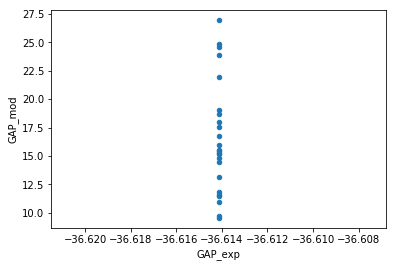

In [46]:
qry.plot.scatter("GAP_exp", "GAP_mod")

In [71]:
qry = df.query('(fit_class in ["on_target"]) and (set == "PNIC-mason.bA.set") and (N_iter in [0, 5]) ').sort_values(['R2_score'], ascending=False)
qry

,N_iter,fit_type,fit_class,set,corrR,R2_score,RMSE,med_abs_err,explained_var,Baysian_IC,Akaike_IC,N_samples,N_feat,OI_exp,GAP_exp,NAM_exp,OI_mod,GAP_mod,NAM_mod
647,5,DNA-ALL-basicL-rep-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.746020e-01,-0.558353,10.592529,2.506085,-3.555948e-02,89.835687,121.030974,14,9,57.005461,-25.125153,12,53.123677,-0.535067,2.0
407,5,DNA-ALL-basicL-rep-nter_core-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.506730e-01,-0.593492,10.711287,2.521084,-6.511768e-02,98.065034,127.343149,14,12,57.005461,-25.125153,12,53.421118,-2.560777,2.0
627,0,DNA-ALL-basicL-rep-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.746020e-01,-0.671000,10.968694,2.496494,-5.876483e-02,90.812782,122.008068,14,9,57.005461,-25.125153,12,51.944879,-5.230477,4.0
143,5,DNA-ALL-basicL-rep-core_vertical-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.002041e-01,-0.683724,11.010375,2.596296,-1.480583e-01,101.475210,130.114267,14,13,57.005461,-25.125153,12,52.999212,-3.327951,14.0
387,0,DNA-ALL-basicL-rep-nter_core-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.502181e-01,-0.711246,11.099997,2.509031,-9.030611e-02,99.063144,128.341258,14,12,57.005461,-25.125153,12,52.355391,-6.836082,12.0
123,0,DNA-ALL-basicL-rep-core_vertical-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,2.203246e-01,-0.768163,11.283085,2.577843,-1.414335e-01,102.160277,130.799335,14,13,57.005461,-25.125153,12,52.061478,-7.413014,12.0
887,5,DNA-ALL-basicL-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,NaN,-1.290741,12.842651,2.607535,0.000000e+00,92.590067,124.424411,14,8,57.005461,-25.125153,12,67.151180,14.568552,0.0
867,0,DNA-ALL-basicL-Ridge-WcvRD10,on_target,PNIC-mason.bA.set,NaN,-1.525455,13.484551,2.763902,0.000000e+00,93.955709,125.790053,14,8,57.005461,-25.125153,12,66.305201,10.792630,0.0
479,5,DNA-ALL-basicL-rep-nter_core-Ridge-WsdRD10,on_target,PNIC-mason.bA.set,2.437318e-01,-2.279384,15.366071,3.067249,5.919449e-02,108.169221,137.447336,14,12,57.005461,-25.125153,12,58.077408,6.662561,0.0
719,5,DNA-ALL-basicL-rep-Ridge-WsdRD10,on_target,PNIC-mason.bA.set,2.746020e-01,-2.281710,15.371520,3.069122,7.523006e-02,100.261976,131.457263,14,9,57.005461,-25.125153,12,57.733018,7.672595,0.0
